In [ ]:
# Question 1

# Attention layers: Q, K, V, O
# 4D^2

# MLP
# 3 * 4D^2 = 12D^2

# Vocab
# 2 * D * V

# Total
# (16D^2 + D) * L + 2DV

# KV cache per token
# [2, L, N, H] = 2LD

In [ ]:
# Question 2

# Total FLOPs = BDF * Z (replication)
# Local Flops = BxDyF

In [ ]:
# Question 3

# A[I, J, K, L] * B[I, J, M, N, O] -> C[K, L, M, N, O]

# Total FLOPs = IJKLMNO

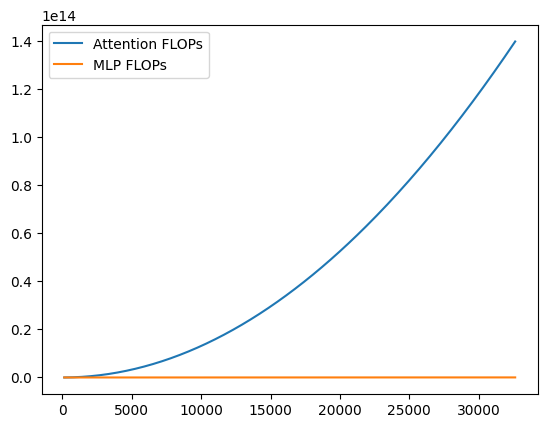

In [7]:
# Question 4

# Q length: T, K, V length: S
# [BHTD] * [BHSD] -> [BHTS]
# [BHTS] * [BHSD] -> [BHTD]
# Attention FLOPs: BHTSD + BHTSD = 2 BHTSD
# Memory required: BHTD + 2 * BHSD

# MLP FLOPs: 
# 2x of [B,S,D] * [D, F] -> [B, S, F] 
# 1x of [B, S, F] * [F, D] -> [B, S, D]
# Total MLP FLOPs: 3BSDF
# Memory required: 2BSD + 3DF + BSF

B = 4
H = 128
D = 128
F = 512

import matplotlib.pyplot as plt
import numpy as np

T = np.arange(128, 32768, 128)
S = np.arange(128, 32768, 128)

attention_flops = 2 * B * H * T * S * D + B * H * T * D
mlp_flops = (3 * B * S * D * F)

plt.plot(S, attention_flops, label='Attention FLOPs')
plt.plot(S, mlp_flops, label='MLP FLOPs')
plt.legend()

In [ ]:
# Question 5
# Attention FLOPs: 2BT^2D
# Q, K, V, O Projection FLOPs: 4BTD^2

# Equivalent when T = 2D, when T > 2D then attention is greater in terms of FLOPs

In [ ]:
# Question 6

# Attention FLOPs: 
#  2 * BHTSD + BHTS + BSD
#   qk, kv, softmax, o

# MLP FLOPs
# BTD

In [16]:
# Question 7

# Peak FLOPs: 1.513e15 FLOPs/s
# 37B activated parameters, 14.8 trillion tokens, total FLOPs is 6 * N * D 
# time taken is 2.79M hours

# MFU = 6 * 37B * 14.8T / 2.79M / 1.51e15 = 

N = 37e9
T = 14.8e12
time = 2.79e6 * 60 * 60

MFU = 6 * N * T / (time * 1.51e15)
MFU

0.21663620467294895

In [ ]:
# Question 8

# each token activates k experts
# let S be total tokens, D be hidden dimension, F be MLP dimension
# [S, D] * [D, F] -> [S, F]
# [S, D] * [D, F] -> [S, F]
# [S, F] * [F, D] -> [S, D]
# compute FLOP = k * SDF
# memory FLOPs = 3(SD + SF + DF) * k
# kSDF > 3(SD + SF + DF) *k
# SDF > (SD + SF + DF)
# S > (1/F + 1/D + 1)

# Just load EDF number of memory FLOP actually...
# then answer is 
# kSDF / EDF = kS / E > 240 (peak arithmetic intensity)